# 01 — Exploratory Data Analysis
**ClinicalTrials.gov Dataset**  
*Author: John Seaton*  
*Last updated: 2025-12-08*

---

## 1. Purpose of This Notebook
This notebook explores the structure, distribution, trends and outliers for the the ClinicalTrials.gov dataset.

Goals:  
- Understand key variables such as phase, enrollment, dates, interventions, sponsors.
- Uncover any outliers that may exist
- Provide a in-depth summary of column missingness
- Explore links between categories and any obvious categorical patterns
- Develop a plan for the cleaning process to be undertaken in 02_cleaning.ipynb

This notebook does not modify the original data.

## 2. Imports and Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

## 3. Load Raw Data

In [3]:
import pandas as pd
df = pd.read_csv('../data/raw/ClinicalTrials/ctg-studies.csv')
df.shape

(530028, 22)

## 4. High Level DataFrame Exploration

In [4]:
df.describe(include='all') # Include non-numeric columns in output


,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
count,530028,530028,530028,530028,530025,477836,516558,387051,530028,172143,...,5.261540e+05,530028,530028,530028,530028,513022,517679,530028,486954,47926
unique,530028,528594,530028,8,214914,396586,508913,384364,46212,73628,...,NaN,9,2,1692,9234,9933,10477,6093,289919,47926
top,NCT05299372,Sun Protection Factor Assay,https://clinicaltrials.gov/study/NCT05299372,COMPLETED,Healthy,OTHER: No intervention,"Bioequivalence, within 30 days","Progress free survival（PFS）, 1 year|Overall su...",Cairo University,National Cancer Institute (NCI),...,NaN,OTHER,INTERVENTIONAL,Observational Model: |Time Perspective: p,2014-01,2025-12-31,2025-12-31,2003-01-27,"National Institutes of Health Clinical Center,...","Study Protocol and Statistical Analysis Plan, ..."
freq,1,14,1,304615,8497,1235,118,18,3599,8091,...,NaN,375118,406244,123784,2078,3768,4188,1515,1515,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.582321e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.805406e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.920000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(3)

,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
524067,NCT04490915,Global Safety and Efficacy Registration Study ...,https://clinicaltrials.gov/study/NCT04490915,ACTIVE_NOT_RECRUITING,Congenital Adrenal Hyperplasia,DRUG: Crinecerfont|DRUG: Placebo,Percent Change From Baseline in Glucocorticoid...,Change From Baseline in Serum Androstenedione ...,Neurocrine Biosciences,NaN,...,182.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2020-12-16,2023-07-19,2027-08,2020-07-29,"Neurocrine Clinical Site, Los Angeles, Califor...","Study Protocol, https://cdn.clinicaltrials.gov..."
257907,NCT02504840,Natural History of Multiple Sclerosis and Its ...,https://clinicaltrials.gov/study/NCT02504840,COMPLETED,Neurologic Disorders|Healthy Volunteers|Multip...,NaN,Association between clinical status and resear...,NaN,National Institute of Neurological Disorders a...,NaN,...,104.0,NIH,OBSERVATIONAL,Observational Model: |Time Perspective: p,2015-07-23,2020-03-05,2020-03-05,2015-07-22,"National Institutes of Health Clinical Center,...",NaN
36563,NCT00935272,Safety/Efficacy Study of Restylane® in Lip Aug...,https://clinicaltrials.gov/study/NCT00935272,COMPLETED,Lip Augmentation,DEVICE: Restylane®|DEVICE: Non-Treatment,"Percentage of Participants With Response, Asse...","Percentage of Participants With a Response, As...",Medicis Global Service Corporation,NaN,...,180.0,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2009-07,2010-06,2010-07,2009-07-09,"Call for Information, San Diego, California, 9...",NaN


In [6]:
df.nunique()

NCT Number                    530028
Study Title                   528594
Study URL                     530028
Study Status                       8
Conditions                    214914
Interventions                 396586
Primary Outcome Measures      508913
Secondary Outcome Measures    384364
Sponsor                        46212
Collaborators                  73628
Age                                6
Phases                             7
Enrollment                      8840
Funder Type                        9
Study Type                         2
Study Design                    1692
Start Date                      9234
Primary Completion Date         9933
Completion Date                10477
First Posted                    6093
Locations                     289919
Study Documents                47926
dtype: int64

In [7]:
df.isna().sum()

NCT Number                         0
Study Title                        0
Study URL                          0
Study Status                       0
Conditions                         3
Interventions                  52192
Primary Outcome Measures       13470
Secondary Outcome Measures    142977
Sponsor                            0
Collaborators                 357885
Age                                0
Phases                        325790
Enrollment                      3874
Funder Type                        0
Study Type                         0
Study Design                       0
Start Date                         0
Primary Completion Date        17006
Completion Date                12349
First Posted                       0
Locations                      43074
Study Documents               482102
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Building a Missingness Map

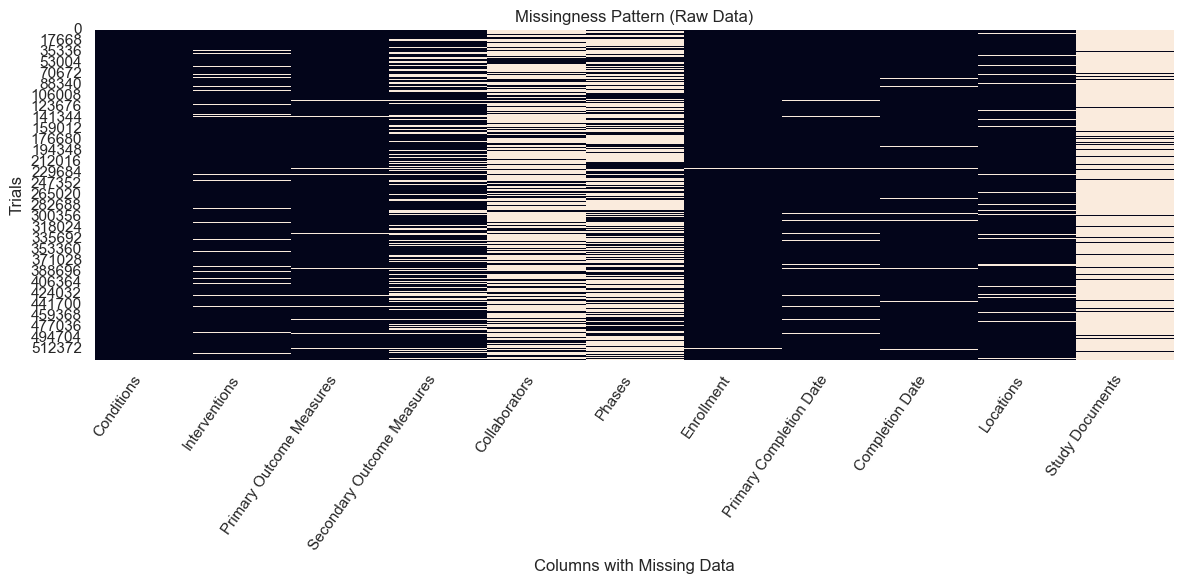

In [9]:
cols_with_na = df.columns[df.isna().any()]
missing = df[cols_with_na].isna()
plt.figure(figsize=(12, 6))
sns.heatmap(missing, cbar=False)
plt.title('Missingness Pattern (Raw Data)')
plt.xlabel('Columns with Missing Data')
plt.ylabel('Trials')
plt.xticks(rotation=55, ha='right')
plt.tight_layout()

The Study Documents column will be dropped from this dataset in the 03_cleaning notebook due to the extremely high amount of missing data. The Collaborators column will also be dropped from this dataset due to the high percentage of missing data, the messiness of the data strings that do exist, and because the Sponsor column already captures some of the relevant details contained in Collaborators. The Phases column is missing an alarming amount of data but will be kept in the dataset and cleaned due to the importance of the information to this analysis.

## 5. Enrollment Analysis

Enrollment is the only numeric datatype in this entire dataset. It is difficult to analyze and visualize due to the extremely wide range of values. The below outputs are an attempt to contextualize and visualize the enrollment numbers for the 530,000+ clinical trials included in this dataset. The smallest trials involve a single participant, while the largest trials involve upwards of 200 million participants.

In [10]:
df['Enrollment'].describe()

count    5.261540e+05
mean     5.582321e+03
std      4.805406e+05
min      0.000000e+00
25%      3.000000e+01
50%      6.800000e+01
75%      1.920000e+02
max      1.888141e+08
Name: Enrollment, dtype: float64

In [11]:
# Show the lowest-enrollment completed trials
completed = df[(df['Study Status'] == 'COMPLETED') &
    (df['Enrollment'] > 0)]
completed.nsmallest(7, 'Enrollment')[['Study Title', 'Study Status', 'Enrollment']]

,Study Title,Study Status,Enrollment
381,Diltiazem in Jervell and Lange-Nielsen Syndrome,COMPLETED,1.0
407,Objective Assessment for Cleft Lip Nasal Defor...,COMPLETED,1.0
972,A 7-year Assessment on Subject Understanding o...,COMPLETED,1.0
1097,LiveWell: Adapted DBT Skills Training for Meta...,COMPLETED,1.0
1149,Magnetic Resonance Guided High Intensity Focus...,COMPLETED,1.0
1247,Nasal Reconstruction Using a Customized 3D-pri...,COMPLETED,1.0
2452,18F-DOPA PET to Elucidate the Antidepressant M...,COMPLETED,1.0


In [12]:
# Show the highest-enrollment completed trials
completed = df[(df['Study Status'] == 'COMPLETED') &
    (df['Enrollment'] > 0)]
completed.nlargest(7, 'Enrollment')[['Study Title', 'Study Status', 'Enrollment', 'Primary Outcome Measures', 'Study Type', 'Study Design']]

,Study Title,Study Status,Enrollment,Primary Outcome Measures,Study Type,Study Design
201064,Effectiveness of the Oxford-AstraZeneca COVID-...,COMPLETED,188814085.0,COVID-19 confirmed by a positive antigen test ...,OBSERVATIONAL,Observational Model: |Time Perspective: p
169803,Analysis of Drug-drug Interaction Alert Based ...,COMPLETED,67128927.0,NaN,OBSERVATIONAL,Observational Model: |Time Perspective: p
169728,Post-Marketing Safety Study of Severe Acute Re...,COMPLETED,50000000.0,Number of Participants With Adverse Events of ...,OBSERVATIONAL,Observational Model: |Time Perspective: p
122884,Epidemiology of Thrombotic Thrombocytopenia Sy...,COMPLETED,41200246.0,Estimate event rates and describe characterist...,OBSERVATIONAL,Observational Model: |Time Perspective: p
289315,Identification of Anticancer Drugs Associated ...,COMPLETED,36580288.0,Disproportionality individual case data analys...,OBSERVATIONAL,Observational Model: |Time Perspective: p
272826,Effects of Dihydropyridine Calcium Channel Inh...,COMPLETED,32000000.0,association between dihydropyridine CCI or ura...,OBSERVATIONAL,Observational Model: |Time Perspective: p
326942,Drug-Induced Sudden Death & Ventricular Arrhyt...,COMPLETED,31000000.0,"All cause death, All data years",OBSERVATIONAL,Observational Model: |Time Perspective: p


The percentile table below summarizes the distribution of clinical trial enrollments. The average trial has a modest number of participants, at 68 and 90% of all clinical trials enroll fewer than 555 participants. There are however, a small subset of trials with extremely large enrollments, with 1% of trials exceeding 10,000 partcipants, and the top 0.1% of trials exceeding 419,000 participants. It should be noted these ultra-high enrollment trials are almost exclusively observational trials and are not representative of interventional drug or biologic studies, which are the key focus on this analysis.

In [13]:
enroll = pd.to_numeric(df['Enrollment'], errors='coerce')

percentiles = np.percentile(enroll.dropna(), [0, 25, 50, 75, 90, 95, 99, 99.5, 99.9])
for p, v in zip([0,25,50,75,90,95,99,99.5,99.9], percentiles):
    print(f'{p}th percentile: {v:,.0f}')

0th percentile: 0
25th percentile: 30
50th percentile: 68
75th percentile: 192
90th percentile: 554
95th percentile: 1,216
99th percentile: 10,000
99.5th percentile: 30,000
99.9th percentile: 419,897


The below chart visualizes the distribution of trial enrollment using a logarithmic scale to accomodate the wide range of enrollment values. Most trials cluster between a few dozen and a few hundred participants, while the long right tail reflects a smalller number of ultra-high enrollment trials. 

For reference:

log(Enrollment + 1) = 2.5 corresponds to a trial enrollment of about 12 participants

log(Enrollment + 1) = 4 corresponds to a trial enrollment of about 54 participants

log(Enrollment + 1) = 5 corresponds to a trial enrollment of about 148 participants

log(Enrollment + 1) = 7.5 corresponds to a trial enrollment of about 1,800 participants


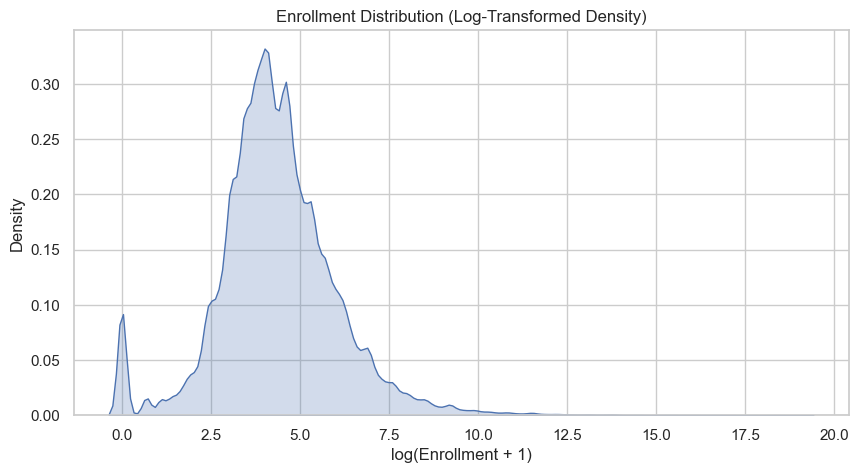

In [14]:
plt.figure(figsize=(10,5))
sns.kdeplot(np.log1p(df['Enrollment']), fill=True)
plt.title('Enrollment Distribution (Log-Transformed Density)')
plt.xlabel('log(Enrollment + 1)')
plt.ylabel('Density')
plt.show()

Identify potential enrollment outliers:

In [15]:
df[df['Enrollment'] > 100000].sort_values('Enrollment', ascending=False).head(3)

,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
201064,NCT05697705,Effectiveness of the Oxford-AstraZeneca COVID-...,https://clinicaltrials.gov/study/NCT05697705,COMPLETED,COVID-19,OTHER: ChAdOx1 nCOV-19 vaccine (Vaxzeria)|OTHE...,COVID-19 confirmed by a positive antigen test ...,NaN,AstraZeneca,NaN,...,188814085.0,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2022-07-22,2023-05-18,2023-05-18,2023-01-26,"Techtrials Pesquisa e Tecnologia Ltda., São Pa...",NaN
437838,NCT04920474,Protocol for a Research Sample Repository for ...,https://clinicaltrials.gov/study/NCT04920474,RECRUITING,Autologous Stem Cell Transplantation|Allogenei...,NaN,To make blood samples available for research s...,NaN,Center for International Blood and Marrow Tran...,NaN,...,99999999.0,NETWORK,OBSERVATIONAL,Observational Model: |Time Perspective: p,1991-07,2030-07,2030-07,2021-06-09,"NMDP Biorepository, New Brighton, Minnesota, 5...",NaN
361140,NCT01166009,CIBMTR Research Database,https://clinicaltrials.gov/study/NCT01166009,RECRUITING,Autologous Stem Cell Transplantation|Allogenei...,NaN,A Comprehensive Source of Observational Data t...,A Comprehensive Source of Data for Marrow Toxi...,Center for International Blood and Marrow Tran...,NaN,...,99999999.0,NETWORK,OBSERVATIONAL,Observational Model: |Time Perspective: p,2002-07,2050-07,2050-07,2010-07-20,Center for International Blood and Marrow Tran...,NaN


These are not outliers, but are primarily placeholder values (99,999,999) used during the recruitment phase of a trial. As mentioned earlier, observational trials will not be central to this analysis and will later be removed from the dataset.

## 6. Dates Exploration

In [16]:
# Identify number of rows where dates are not cleanly converted from object to valid datetime
pd.to_datetime(df['Start Date'], errors='coerce').isna().sum()

np.int64(209293)

In [17]:
# Identify examples of irregular date formats in the Start Date column using regex
df[df['Start Date'].str.match(r'^\d{4}-\d{2}$', na=False)].head()

,NCT Number,Study Title,Study URL,Study Status,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Locations,Study Documents
3,NCT00414895,Absolute Myocardial Perfusion Measurement in t...,https://clinicaltrials.gov/study/NCT00414895,COMPLETED,Cardiac Transplantation,NaN,NaN,NaN,"Insel Gruppe AG, University Hospital Bern",Swiss National Science Foundation|Swiss Heart ...,...,90.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2006-12,2008-12,2009-06,2006-12-22,"University Hospital Inselspital, Bern, 3010, S...",NaN
5,NCT01588795,Renal Denervation in Diabetic Nephropathy,https://clinicaltrials.gov/study/NCT01588795,COMPLETED,Diabetic Nephropathy|Persistent Proteinuria Wi...,PROCEDURE: Percutaneous renal denervation and ...,"proteinuria/creatininuria ratio, from baseline...",Number of patients with a decrease of the PU/C...,Assistance Publique - Hôpitaux de Paris,NaN,...,25.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2012-04,2016-01,2016-01,2012-05-01,"CIC Hopital europeen george pompidou, Paris, P...",NaN
6,NCT01294995,Effect of Short-term Chinese Tea-flavor Liquor...,https://clinicaltrials.gov/study/NCT01294995,COMPLETED,Cardiovascular Diseases,DIETARY_SUPPLEMENT: Tea-flavor Liquor|DIETARY_...,NaN,NaN,Zhejiang University,"Guizhou Meijiao Co., Ltd",...,45.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2010-10,2010-11,2010-11,2011-02-14,"Department of food science and nutrition, Hang...",NaN
7,NCT00925795,Effect of Extra Virgin Olive Oil on Atheroscle...,https://clinicaltrials.gov/study/NCT00925795,COMPLETED,HIV|Atherosclerosis|HIV Infections,OTHER: consumption 1. EVOO; 2. ROO|OTHER: cons...,To assess whether consumption of extra virgin ...,To assess which atherosclerosis biomarkers are...,"University Hospital for Infectious Diseases, C...",NaN,...,39.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CRO...,2009-09,2010-08,2010-10,2009-06-22,"University Hospital for Infectious Diseases ""D...",NaN
18,NCT03131739,Alaska Native Collaborative Hub for Resilience...,https://clinicaltrials.gov/study/NCT03131739,UNKNOWN,Suicide,NaN,Community Level Assessment: suicide and accide...,Individual Level Assessment: Youth: Individual...,University of Alaska Fairbanks,"University of Massachusetts, Amherst|Universit...",...,585.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2018-12,2021-08,2021-08,2017-04-27,NaN,NaN


The irregular date formats are dates that do not include a day in the format YYYY-MM-DD. These will be handled in 03_cleaning.ipynb.

## 7. Phases Exploration

In [18]:
df['Phases'].value_counts()

Phases
PHASE2           59379
PHASE1           44736
PHASE3           39119
PHASE4           33139
PHASE1|PHASE2    15396
PHASE2|PHASE3     6972
EARLY_PHASE1      5497
Name: count, dtype: int64

Text(0.5, 1.0, 'Phase Distribution')

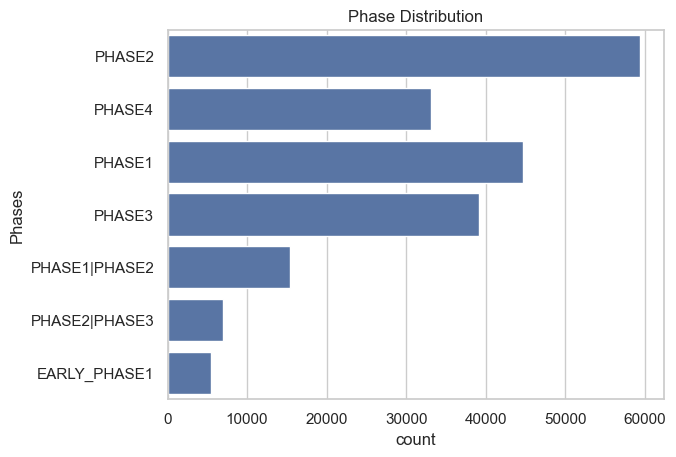

In [19]:
sns.countplot(y=df['Phases'])
plt.title('Phase Distribution')

There are some trials that show multiple phases such as Phase 1|Phase 2. These are scenarios where the phases are running concurrently. For the sake of my analysis, I will convert these to the higher of the two phases in the 03_cleaning notebook.

## 8. Interventions Exploration

In [20]:
df['Interventions'].sample(7)

526740                                                  NaN
254912       DRUG: Lidocaine infusion|DRUG: Saline infusion
507071                                 DIAGNOSTIC_TEST: ECG
180311    DRUG: Apatinib Mesylate Tablets|DRUG: EGFR-TKI...
253211                                                  NaN
223652                  OTHER: treatment with NOACs or VKAs
253144    OTHER: electrical impedance tomography during ...
Name: Interventions, dtype: object

In [21]:
# Explore the frequency of different Intervention types using regex
df['Interventions'].str.extract(r'^([A-Z]+):', expand=False).value_counts()

Interventions
DRUG          177688
OTHER          81346
DEVICE         61076
BEHAVIORAL     50922
PROCEDURE      43007
BIOLOGICAL     24049
RADIATION       5053
GENETIC         2096
Name: count, dtype: int64

The Intervention column contains a range of intervention types, but for the purpose of focusing on global drug development, I will restrict the analysis in the 03_cleaning.ipynb notebook to trials involving 'Drug' and 'Biological' inteventions. These categories represent the core therapeutic pipeline addressed in the business case and align with FDA regulatory pathways.

In [22]:
df['Interventions'].str.contains(r'\|', na=False).mean()

np.float64(0.4741994762540847)

Interventions often contain multiple components (for example, a DRUG and a DEVICE) so these will need to be parsed in the cleaning notebook for proper analysis. The above calculation shows approximately 47% of all clinical trials contain multiple Interventions, so there is significantly parsing and cleaning required before a proper analysis can take place.

## 9. Conditions Exploration

In [23]:
df['Conditions'].value_counts().head(20)

Conditions
Healthy                      8497
Breast Cancer                4763
Prostate Cancer              2790
Obesity                      2415
Asthma                       2379
Stroke                       2160
Healthy Volunteers           2021
Hypertension                 1846
Coronary Artery Disease      1681
Rheumatoid Arthritis         1635
Heart Failure                1627
Diabetes Mellitus, Type 2    1570
Cancer                       1568
COVID-19                     1552
Multiple Sclerosis           1544
Colorectal Cancer            1506
HIV Infections               1483
Lung Cancer                  1468
Pain                         1451
Schizophrenia                1449
Name: count, dtype: int64

Text(0.5, 0, 'Number of Trials')

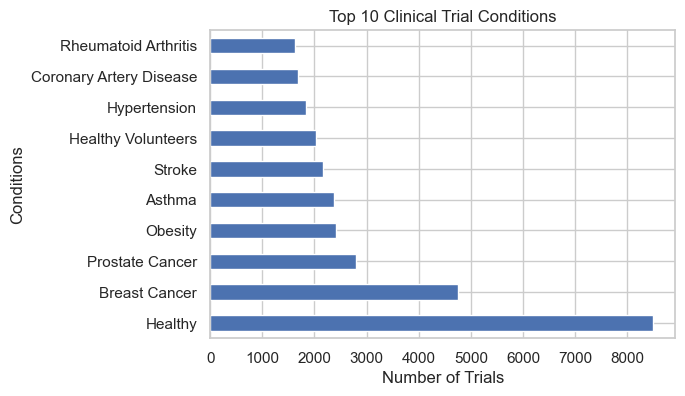

In [24]:
df['Conditions'].value_counts().head(10).plot(kind='barh', figsize=(6,4))
plt.title("Top 10 Clinical Trial Conditions")
plt.xlabel("Number of Trials")

In [25]:
# Show random sample of trial Conditions
df['Conditions'].sample(20).tolist()

['Cancer',
 'Pressure Ulcer|Nursing Caries',
 'Cigarette Smoking',
 'Glioblastoma',
 'Psoriatic Arthritis',
 'Acute Myeloid Leukemia|Genetic Predisposition to Disease',
 'IgG4-Related Diseases',
 'First Episode Psychosis',
 'Achilles Tendon Rupture|Blood Flow Restriction Therapy',
 'Diastolic Heart Failure',
 'Healthy Subjects',
 'Shock, Septic|Shock, Hemorrhagic',
 'Drug-refractory Paroxysmal Atrial Fibrillation',
 'Non-Alcoholic Fatty Liver Disease',
 'Advanced Solid Malignancies',
 'Spinal Cord Injuries',
 'Lung Cancer',
 'Osteoporosis|Sarcopenia',
 'Obesity',
 'Food Allergy in Infants']

In [26]:
# Determine how many trials have multiple Conditions
multiple = df['Conditions'].str.contains(r"\|", na=False)
multiple.sum(), len(df), multiple.mean()

(np.int64(187283), 530028, np.float64(0.3533454836348268))

About 35% (187,283 trials) of all trials contain multiple Conditions. These multiple Condition trials will be split out into multiple columns in the cleaning notebook.

## 10. Locations Exploration

In [27]:
df['Locations'].sample(7)

284825    Royal Free Hospital - Dept of Clinical Neurosc...
61249     Baylor University, Waco, Texas, 76798, United ...
122780                                                  NaN
357955    East Lancashire, Blackburn, United Kingdom|Roy...
419430                                                  NaN
521217    Universitair ziekenhuis Antwerpen, Edegem, Ant...
141097    Ripah International University, Faisalabad, Pu...
Name: Locations, dtype: object

The Locations column contains unstandardized site descriptions, including combinations of site names, cities, states, and countries. The primary focus on Locations in this analysis will be on the countries that are used for clinical trial sites, so this data will require extraction of the country name in the cleaning notebook.

## 11. Sponsors Exploration

In [28]:
df['Sponsor'].value_counts()

Sponsor
Cairo University                                         3599
GlaxoSmithKline                                          3551
National Cancer Institute (NCI)                          3476
AstraZeneca                                              3295
Assiut University                                        3237
                                                         ... 
Morehead State University                                   1
Michael A. McCaskey                                         1
Mahmoud Massoud                                             1
Asociación de Oncología Médica del Hospital de Cruces       1
National Food Technology Research Centre, Botswana          1
Name: count, Length: 46212, dtype: int64

In [29]:
df['Funder Type'].value_counts()

Funder Type
OTHER        375118
INDUSTRY     120900
OTHER_GOV     13654
NIH           10523
NETWORK        4638
FED            4572
INDIV           550
UNKNOWN          70
AMBIG             3
Name: count, dtype: int64

Funnder Type and Sponsor will offer useful correlations with other key datapoints in this dataset. The Sponsor distribution is very long-tailed, meaning there is a extremely high number of sponsors that only appear once. As a result, the more general Funder Type data may provide more useful correlations.